# Predicting House Prices

In this notebook, you will use the Ames housing data as training data to build a machine learning model to predict house prices.

This data set includes both categorical and quantitative features, and will allow you to practice incorporating `ColumnTransformer`s and `Pipeline`s into your machine learning models.

In [126]:
! cd data && wget https://datasci112.stanford.edu/data/housing.tsv

import pandas as pd
df = pd.read_table("data/housing.tsv", sep="\t")
df.head()

--2025-08-15 17:07:28--  https://datasci112.stanford.edu/data/housing.tsv
Resolving datasci112.stanford.edu (datasci112.stanford.edu)... 54.81.116.232
Connecting to datasci112.stanford.edu (datasci112.stanford.edu)|54.81.116.232|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://web.stanford.edu/class/datasci112//data/housing.tsv [following]
--2025-08-15 17:07:29--  https://web.stanford.edu/class/datasci112//data/housing.tsv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 971331 (949K) [text/tab-separated-values]
Saving to: ‘housing.tsv.1’

housing.tsv.1       100%[===================>] 948.57K   419KB/s    in 2.3s    

2025-08-15 17:07:32 (419 KB/s) - ‘housing.tsv.1’ saved [971331/971331]



,PID,Gr Liv Area,Bedroom AbvGr,Full Bath,Half Bath,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,1656,3,1,0,20,RL,141.0,31770,Pave,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,896,2,1,0,20,RH,80.0,11622,Pave,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,1329,3,1,1,20,RL,81.0,14267,Pave,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,2110,3,2,1,20,RL,93.0,11160,Pave,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,1629,3,2,1,60,RL,74.0,13830,Pave,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Exercise 1

Fit a $10$-nearest neighbors model to predict the **SalePrice** of an 1800 square foot, 3 bedroom, 2 bathroom home.

A `DataFrame` consisting of this "test data" is provided for you.

In [127]:
# define the test dataset
X_test = pd.DataFrame([
    {"Gr Liv Area": 1800,
     "Bedroom AbvGr": 3,
     "Full Bath": 2}
])
X_test

,Gr Liv Area,Bedroom AbvGr,Full Bath
0,1800,3,2


In [128]:
X_train = df[["Gr Liv Area", "Bedroom AbvGr", "Full Bath"]]
y_train = df["SalePrice"]

# standardize the features
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train_scaled = (X_train - X_train_mean) / X_train_std

In [129]:
# standardize the test data
X_test_scaled = (X_test - X_train_mean) / X_train_std
X_test_scaled

,Gr Liv Area,Bedroom AbvGr,Full Bath
0,0.594074,0.176064,0.783894


In [130]:
# calculate the Euclidean distances
import numpy as np
dists = np.sqrt(
    ((X_test_scaled - X_train_scaled) ** 2).sum(axis=1)
)
dists

0       1.83081
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
2925    0.00000
2926    0.00000
2927    0.00000
2928    0.00000
2929    0.00000
Length: 2930, dtype: float64

In [131]:
# find the 10 nearest neighbors
index_nearest = dists.sort_values().index[:10]
index_nearest

Index([1464, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1947], dtype='int64')

In [132]:
# predict the sale price
y_train[index_nearest].mean()

np.float64(132570.0)

## Exercise 2

Fit a $10$-nearest neighbors model to predict the **Sale Price** of a home in each neighborhood of Ames. That is, the categorical variable **Neighborhood** should be the only input feature to your model.

A `DataFrame` consisting of this "test data" is provided for you.

Can you explain intuitively what the $k$-nearest neighbors model is doing? For example, what is the prediction for the Bluestem ("Blueste") neighborhood?

In [133]:
# define the test dataset
X_test = pd.DataFrame({
    "Neighborhood": df["Neighborhood"].unique()
})
X_test

,Neighborhood
0,NAmes
1,Gilbert
2,StoneBr
3,NWAmes
4,Somerst
5,BrDale
6,NPkVill
7,NridgHt
8,Blmngtn
9,NoRidge


In [134]:
# do one-hot encoding for training data
X_train = df[["Neighborhood"]]
X_train = pd.get_dummies(X_train, drop_first=True, dtype=int)
X_train

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# do one-hot encoding for test data
X_test = pd.get_dummies(X_test, drop_first=True, dtype=int)
X_test

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [136]:
# fit 10-nearest neighbors using KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

y_train = df["SalePrice"]
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X=X_train, y=y_train)
predict = model.predict(X=X_test)
predict 

array([142771. , 205490. , 372862.5, 181450. , 264100. ,  99305. ,
       140465. , 333880. , 209917.9, 353150. , 168800. , 142200. ,
       198724. , 129540. , 111268.9, 105500. , 208190. , 131538.4,
       144510. , 164193.2, 165233.7, 143590. , 171400. , 227865.1,
       101370. , 232525. , 218003.8, 196053.1])

In [137]:
# find the "Neighborhood == 'Blueste'" from predicted values
predict[X_test["Neighborhood_Blueste"] == 1]

array([143590.])

In [138]:
# get the mean SalePrice for the "Neighborhood == 'Blueste'"
df[df["Neighborhood"]=="Blueste"]["SalePrice"].mean()

np.float64(143590.0)

## Exercise 3

Fit a $10$-nearest neighbors model to predict the **Sale Price** of a 1800 square foot, 3 bedroom, 2 bathroom two-story home (**House Style**) in the Veenker neighborhood (**Neighborhood**) of Ames.

How does this compare with the predictions from the models you fit in Exercises 1 and 2?

In [139]:
# check House Style
df["House Style"]

0       1Story
1       1Story
2       1Story
3       1Story
4       2Story
         ...  
2925      SLvl
2926    1Story
2927    SFoyer
2928    1Story
2929    2Story
Name: House Style, Length: 2930, dtype: object

In [140]:
# define the test dataset
X_test = pd.DataFrame([
    {"Gr Liv Area": 1800,
     "Bedroom AbvGr": 3,
     "Full Bath": 2,
     "House Style": "2Story",
     "Neighborhood": "Veenker"
}
])
X_test

,Gr Liv Area,Bedroom AbvGr,Full Bath,House Style,Neighborhood
0,1800,3,2,2Story,Veenker


In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn import set_config

# numerical variable: "Gr Liv Area", "Bedroom AbvGr", "Full Bath"
# categorical variable: "House Style", "Neighborhood"
numerical_variables = ["Gr Liv Area", "Bedroom AbvGr", "Full Bath"]
categorical_variables = ["House Style", "Neighborhood"]

# define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_variables),
        ("cat", OneHotEncoder(), categorical_variables)
    ]
)

# create the pipeline
model_pipeline_KNN = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", KNeighborsRegressor(n_neighbors=10))
])

# display the diagram
set_config(display="diagram")
model_pipeline_KNN

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [142]:
# define the training dataset
X_train = df[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "House Style", "Neighborhood"]]
y_train = df["SalePrice"]

# fit the model
model_pipeline_KNN.fit(X=X_train, y=y_train)
model_pipeline_KNN.predict(X=X_test)

array([234540.])

## Exercise 4

One of the best things about Scikit-Learn is how easy it is to try out different machine learning models.

For example, another popular machine learning model is **linear regression**. Repeat Exercise 3, but replace $k$-nearest neighbors by linear regression. The `LinearRegression` [model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) in Scikit-Learn has been imported for you.

How does the linear regression prediction compare with the $k$-nearest neighbors prediction?

In [143]:
from sklearn.linear_model import LinearRegression

# define the pipeline
model_pipeline_LR = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# display the diagram
set_config(display="diagram")
model_pipeline_LR

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [144]:
model_pipeline_LR.fit(X=X_train, y=y_train)
model_pipeline_LR.predict(X=X_test)

array([215469.16983658])

## 📊 K-NN 방식 vs Linear Regression 방식 비교 분석 (by Copilot)

머신러닝에서 회귀 문제를 해결하는 대표적인 두 알고리즘인 K-NN 회귀와 선형 회귀를 다양한 관점에서 비교해봅니다.

---

### 🔍 기본 개념 비교

| 항목 | K-NN 회귀 | 선형 회귀 |
|------|-----------|------------|
| **모델 유형** | 비모수적 (non-parametric) | 모수적 (parametric) |
| **예측 방식** | 주변 K개의 이웃 평균값 | 입력 변수와 출력 변수 간의 선형 관계 모델링 |
| **학습 방식** | 학습 데이터 저장만 함 | 데이터로부터 최적의 직선(기울기, 절편)을 학습 |
| **수식 기반** | 없음 (거리 기반) | $y = ax + b$ 형태의 수식 사용 |

---

### ✅ 장점 비교

#### K-NN 방식
- 데이터에 대한 **가정이 없어 유연함**
- **복잡한 비선형 관계**도 잘 포착 가능
- **이해하기 쉬운 방식**으로 직관적

#### Linear Regression
- **학습과 예측 속도가 빠름**
- **해석이 쉬움**: 계수로 변수 영향력 파악 가능
- **고차원 데이터나 희소 데이터**에도 잘 작동
- **외삽(extrapolation)** 가능: 훈련 범위 밖 예측도 가능

---

### ⚠️ 단점 비교

#### K-NN 방식
- **예측 속도가 느림**: 모든 데이터와 거리 계산 필요
- **고차원 데이터에 취약**: 차원의 저주 발생 가능
- **외삽 불가능**: 훈련 범위 밖 데이터 예측 정확도 낮음
- **적절한 K값 선택이 중요**

#### Linear Regression
- **선형 관계 가정**이 맞지 않으면 성능 저하
- **이상치(outlier)에 민감**
- **복잡한 패턴 학습 어려움**: 비선형 관계는 다항 회귀 등으로 보완 필요

---

### 🧠 적용 예시

- **K-NN 회귀**: 생선의 길이로 무게 예측할 때, 훈련 데이터 근처에서는 매우 정확하지만 훈련 범위를 벗어나면 예측값이 고정됨
- **선형 회귀**: 같은 생선 데이터에서 직선 모델을 학습하여 훈련 범위 밖에서도 예측 가능하지만, 실제 데이터가 곡선 형태일 경우 오차 발생 가능

---

### 🧭 선택 기준

- **데이터가 선형적**이고 해석이 중요한 경우 → 선형 회귀
- **복잡하고 비선형적인 패턴**이 존재하거나 직관적인 예측이 필요한 경우 → K-NN 회귀


## Exercise 5: Visualizing Machine Learning Models

Let's develop some intuition for linear regression and $k$-nearest neighbors by visualizing the fitted model.

In order to visualize the model, we will use just one quantitative input feature, **Gr Liv Area**. The code to visualize the fitted linear regression model has been provided for you.

Now, do the same for a $10$-nearest neighbors model. How does a $k$-nearest neighbors model visually differ from a linear regression model? What happens to the model as you increase $k$?

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

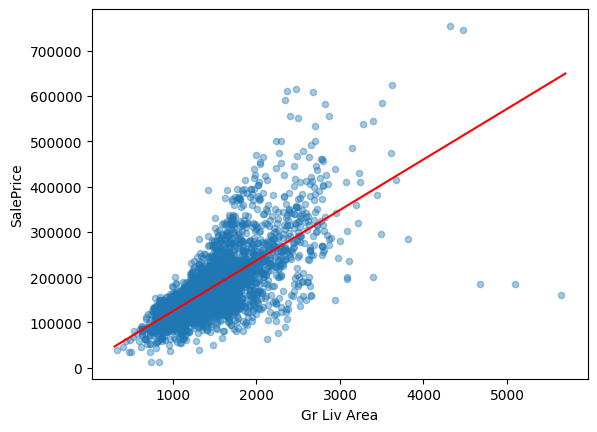

In [145]:
# fit a linear regression model to the training data
X_train = df[["Gr Liv Area"]]
y_train = df["SalePrice"]
model = LinearRegression()
model.fit(X_train, y_train)

# create a grid of equally spaced values between 300 and 5700
X_test = pd.DataFrame({
    "Gr Liv Area": range(300, 5700)
})
# get the model predictions for these values
y_test_ = model.predict(X_test)

# make a scatterplot
ax = df.plot.scatter(x="Gr Liv Area", y="SalePrice", alpha=0.4)

# plot the fitted model on top of the scatterplot as a line
pd.Series(y_test_, index=X_test["Gr Liv Area"]).plot.line(ax=ax, color="red")

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

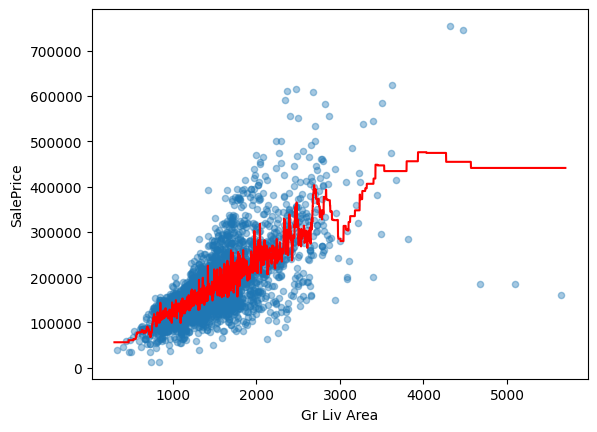

In [146]:
# visualize k-nearest neighbors model (k = 10)

# fit a linear regression model to the training data
X_train = df[["Gr Liv Area"]]
y_train = df["SalePrice"]
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

# create a grid of equally spaced values between 300 and 5700
X_test = pd.DataFrame({
    "Gr Liv Area": range(300, 5700)
})
# get the model predictions for these values
y_test_ = model.predict(X_test)

# make a scatterplot
ax = df.plot.scatter(x="Gr Liv Area", y="SalePrice", alpha=0.4)

# plot the fitted model on top of the scatterplot as a line
pd.Series(y_test_, index=X_test["Gr Liv Area"]).plot.line(ax=ax, color="red")

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

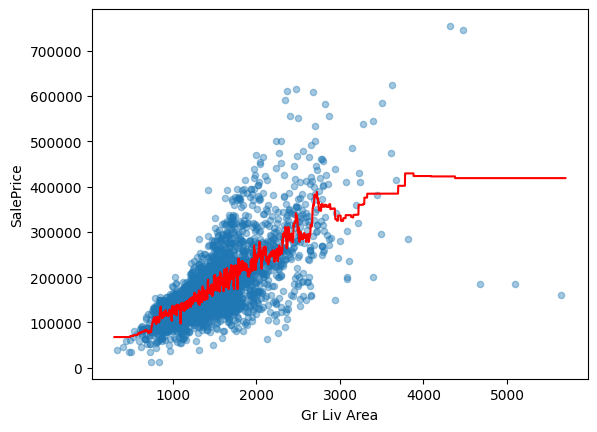

In [147]:
# when we increase the k to 20...
model = KNeighborsRegressor(n_neighbors=20)
model.fit(X_train, y_train)

# get the model predictions for these values
y_test_ = model.predict(X_test)

# make a scatterplot
ax = df.plot.scatter(x="Gr Liv Area", y="SalePrice", alpha=0.4)

# plot the fitted model on top of the scatterplot as a line
pd.Series(y_test_, index=X_test["Gr Liv Area"]).plot.line(ax=ax, color="red")

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

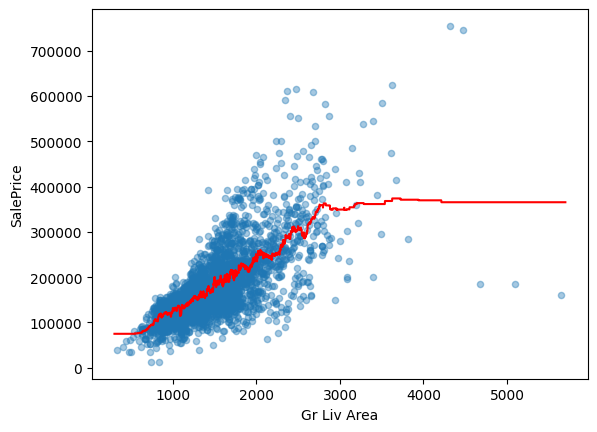

In [149]:
# when we increase the k to 50...
model = KNeighborsRegressor(n_neighbors=50)
model.fit(X_train, y_train)

# get the model predictions for these values
y_test_ = model.predict(X_test)

# make a scatterplot
ax = df.plot.scatter(x="Gr Liv Area", y="SalePrice", alpha=0.4)

# plot the fitted model on top of the scatterplot as a line
pd.Series(y_test_, index=X_test["Gr Liv Area"]).plot.line(ax=ax, color="red")

# as k increases, the model becomes smoother and less sensitive to noise in the data
# and the k-NN model starts to resemble linear regression

## Moral

Notice that we get different predictions from our machine learning model, depending on:

- which input features we use,
- which model we use (linear regression or $k$-nearest neighbors),
- which $k$ we use in $k$-nearest neighbors.

In the next few classes, we will discuss how to evaluate and compare different machine learning models.